# Third Team Homework

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import logging
logging.captureWarnings(True) # Logging warnings in order to suppress them

In [2]:
file_location = "../kn57Nodes1to57_adj20.txt" 
adj_matrix = np.genfromtxt(file_location, delimiter=' ', skip_header = 1)
graph = nx.Graph(adj_matrix)

In [3]:
nx.is_connected(graph)

True

Since the graph is connected, in the algorithms below I will assume that the input graph is connected.

## Exercise 1

### Question 1

In [4]:
def spectral_algorithm_normalized_laplacian(G):
    # (1) Compute the symmetric normalized graph Laplacian
    # ∆ = I − D−1/2AD−1/2, with D = Diag(A · 1) the degree matrix.
    normalized_laplacian = nx.normalized_laplacian_matrix(G).todense()
    # (2) Compute the second smallest eigenpair: (e1, λ1), with  ̃∆e1 = λ1e1
    # and λ1 > 0 = λ0.
    eigenvalues, eigenvectors = np.linalg.eig(normalized_laplacian)
    sorted_eigenvectors = eigenvectors[eigenvalues.argsort()]
    e1 = sorted_eigenvectors[1]
    # (3) Define the partition Ω1 = {k : e1(k) > 0}, Ω2 = {k : e1(k) ≤ 0}. Set
    # d = 2
    omega1 = {k for k, g in zip(G.nodes,e1) if g > 0}
    omega2 = {k for k, g in zip(G.nodes,e1) if g <= 0}
    return omega1, omega2    

In [5]:
print(*spectral_algorithm_normalized_laplacian(graph),sep="\n")

{1, 2, 9, 14, 15, 16, 17, 18, 20, 22, 23, 25, 28, 29, 30, 31, 32, 33, 35, 38, 39, 40, 45, 48, 50, 51, 53, 54}
{0, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 19, 21, 24, 26, 27, 34, 36, 37, 41, 42, 43, 44, 46, 47, 49, 52, 55, 56}


### Question 2

In [6]:
def spectral_algorithm_laplacian(G):
    # (1) Compute the graph Laplacian ∆ = D − A, with D = Diag(A · 1), the
    # degree matrix.
    laplacian = nx.laplacian_matrix(G).todense()
    # (2) Compute the second smallest eigenpair: (e1, λ1), with ∆e1 = λ1e1
    # and λ1 > 0 = λ0.
    eigenvalues, eigenvectors = np.linalg.eig(laplacian)
    sorted_eigenvectors = eigenvectors[eigenvalues.argsort()]
    e1 = sorted_eigenvectors[1]
    # (3) Define the partition Ω1 = {k : e1(k) > 0}, Ω2 = {k : e1(k) ≤ 0}. Set
    # d = 2.
    omega1 = {k for k, g in zip(G.nodes,e1) if g > 0}
    omega2 = {k for k, g in zip(G.nodes,e1) if g <= 0}
    return omega1, omega2    

In [7]:
print(*spectral_algorithm_laplacian(graph),sep="\n")

{2, 7, 10, 12, 13, 15, 16, 18, 21, 24, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 39, 46, 47, 48, 50, 51, 53, 54, 55, 56}
{0, 1, 3, 4, 5, 6, 8, 9, 11, 14, 17, 19, 20, 22, 23, 25, 33, 37, 38, 40, 41, 42, 43, 44, 45, 49, 52}


### Question 3

In [8]:
def spectral_algorithm_weight(G):
    weight = nx.adjacency_matrix(G).todense()
    # (1) Compute the second largest eigenpair of A: (f2, μ2), with Af2 = μ2f1.
    eigenvalues, eigenvectors = np.linalg.eig(weight)
    sorted_eigenvectors = eigenvectors[eigenvalues.argsort()]
    f2 = sorted_eigenvectors[-1]
    # (2) Define the partition Ω1 = {k : f2(k) > 0}, Ω2 = {k : f2(k) ≤ 0}. Set
    # d = 2.
    omega1 = {k for k, g in zip(G.nodes,f2) if g > 0}
    omega2 = {k for k, g in zip(G.nodes,f2) if g <= 0}
    return omega1, omega2    

In [9]:
print(*spectral_algorithm_weight(graph),sep="\n")

{2, 4, 5, 7, 10, 12, 13, 15, 18, 19, 20, 26, 28, 29, 31, 32, 40, 41, 43, 44, 45, 50, 51, 52, 53, 54, 56}
{0, 1, 3, 6, 8, 9, 11, 14, 16, 17, 21, 22, 23, 24, 25, 27, 30, 33, 34, 35, 36, 37, 38, 39, 42, 46, 47, 48, 49, 55}


## Exercise 2

### Question 1

In [10]:
from scipy.linalg import fractional_matrix_power

# Laplacian Eigenmap data embedding for target dimension d = 2
def laplacian_eigenmap(G, d):
    # Input: Weight matrix W , target dimension d
    weight = nx.adjacency_matrix(G).todense()
    # (1) Construct the diagonal matrix D = diag(Dii )1≤i≤n, where
    # Dii = ∑_{k=1}^N Wi,k
    diagonal = np.diag(np.sum(weight,axis=1))
    # (2) Construct the normalized Laplacian  ̃∆ = I − D−1/2WD−1/2.
    normalized_laplacian = nx.normalized_laplacian_matrix(G).todense()
    # (3) Compute the bottom d + 1 eigenvectors e1, · · · , ed+1,  ̃∆ek = λk ek ,
    # 0 = λ1 ≤ · · · ≤ λd+1.
    eigenvalues, eigenvectors = np.linalg.eig(weight)
    sorted_eigenvectors = eigenvectors[eigenvalues.argsort()]
    bottom_eigenvectors = sorted_eigenvectors[1:d+1]
    # (4) Construct the d × n matrix Y:
    # Y = [e2^T, ..., ed+1^T]^T * D−1/2
    Y = bottom_eigenvectors @ fractional_matrix_power(diagonal,-1/2)
    # (5) The new geometric graph is obtained by converting the columns of Y
    # into n d-dimensional vectors:
    # [y1 | · · · | yn] = Y
    return Y

In [11]:
laplacian_eigenmap_embedding = laplacian_eigenmap(graph,2).T
print(laplacian_eigenmap_embedding)

[[-1.12599047e-02 -2.15910342e-02]
 [-3.27488846e-02 -2.92721049e-02]
 [ 2.22429994e-02  2.44255624e-02]
 [ 3.49987674e-03 -3.47225796e-03]
 [-4.51329650e-03 -1.95043033e-02]
 [-8.22316376e-02  1.93752228e-02]
 [-1.56497573e-02  3.49513417e-02]
 [ 1.72236397e-02  8.09014180e-05]
 [ 1.18906175e-02  5.78695885e-03]
 [ 3.21866931e-02  1.16106931e-02]
 [ 5.58814077e-02 -8.79114111e-03]
 [-6.94973036e-03 -1.97632765e-02]
 [-3.04449576e-03  2.40977815e-03]
 [ 3.71272278e-04  4.87455535e-02]
 [-2.90039838e-02  2.75288419e-02]
 [ 6.89024714e-03 -2.92996839e-02]
 [ 5.34611495e-02 -3.56280619e-02]
 [-1.28930370e-02  2.07849200e-02]
 [ 2.52231122e-02 -5.21711574e-03]
 [ 1.40133184e-04 -1.48202033e-01]
 [ 8.64698666e-03 -9.48100763e-02]
 [ 2.08578689e-02  1.93541120e-02]
 [-1.15411286e-02 -4.83353769e-03]
 [ 2.55421836e-02  4.87672642e-02]
 [-1.28471033e-02 -8.42377824e-04]
 [-5.69251740e-02 -4.40078735e-02]
 [ 8.89271242e-03 -2.18163230e-02]
 [ 1.71363849e-04  1.48292606e-02]
 [-7.45593483e-02 -4

# Exercise 2

In [104]:
laplacian_eigenmap_embedding = laplacian_eigenmap(graph,d=2)
print(laplacian_eigenmap_embedding,laplacian_eigenmap_embedding.shape, sep="\n")

[[-1.12599047e-02 -3.27488846e-02  2.22429994e-02  3.49987674e-03
  -4.51329650e-03 -8.22316376e-02 -1.56497573e-02  1.72236397e-02
   1.18906175e-02  3.21866931e-02  5.58814077e-02 -6.94973036e-03
  -3.04449576e-03  3.71272278e-04 -2.90039838e-02  6.89024714e-03
   5.34611495e-02 -1.28930370e-02  2.52231122e-02  1.40133184e-04
   8.64698666e-03  2.08578689e-02 -1.15411286e-02  2.55421836e-02
  -1.28471033e-02 -5.69251740e-02  8.89271242e-03  1.71363849e-04
  -7.45593483e-02 -2.25283707e-02  9.47816831e-03 -2.11518572e-02
   1.33909590e-02  2.45947036e-03  1.98089059e-02  2.95066342e-02
   3.85371628e-02 -2.40415591e-03  1.32683503e-02  7.49487883e-02
   2.41150728e-02  3.88416833e-02  4.00551578e-02  1.08411638e-02
  -1.50370868e-03 -3.39936160e-02  8.87827236e-02  8.24995400e-02
  -3.21534703e-16  1.97739035e-16  2.95739422e-17  1.03396882e-16
   7.51401409e-17 -2.45800084e-17  1.10871976e-17 -9.55801509e-17
   2.72683561e-17]
 [-2.15910342e-02 -2.92721049e-02  2.44255624e-02 -3.4722

### Part a

In [110]:
laplacian_eigenmap_graph = laplacian_eigenmap(graph,d=10).T
print(laplacian_eigenmap_graph.shape, sep="\n")
#print(laplacian_eigenmap_graph,laplacian_eigenmap_graph.shape, sep="\n")

(57, 10)


### Part b

In [109]:
from scipy.optimize import minimize

def dimension_reduction_lle_non_negativity_constraints(X, K, d):
    # Input: A geometric graph {x1, x2, · · · , xn} ⊂ RN . Parameters:
    # neighborhood size K and dimension d.
    n = X.shape[0]
    
    # (1) Finding the weight matrix B: 
    B = np.zeros((n, n))
   
    # (Precomputing nearest neighbors for each point)
    nn = NearestNeighbors(n_neighbors=K+1)
    nn.fit(X)
    _, indices = nn.kneighbors(X)
    V = indices[:, 1:] ## the closest neighbor is itself, so remove it
    #print(indices)
    
    # For each point i do the following:
    for i in range(n):
        # (1) Find its closest K neighbors, say Vi; 
        # Let r : Vi → {1, 2, · · · , K } denote an indexing map;
        closest_k_neighbors = X[V[i]]
        # (2) Compute the K × K local covariance matrix C,
        # Cr(j),r(k) = 〈xj − xi , xk − xi.
        closest_k_neighbors_diffs = closest_k_neighbors - X[i]
        C = np.cov(closest_k_neighbors_diffs)
        # (3) Solve for u, minimize u^T C u subject to u ≥ 0 , u^T · 1 = 1
        # where 1 denotes the K -vector of 1’s.
        objective = lambda u: u.dot(C.dot(u)) 
        constraints = (
            {'type': 'eq', 'fun': lambda u: u.dot(np.ones(K)) - 1},
            {'type': 'ineq', 'fun': lambda u: u})
        u0 = np.ones(K)
        result = minimize(objective, u0, method='SLSQP', constraints=constraints)
        u = result.x
        # (4) Set Bi,j = ur(j) for j ∈ Vi.
        B[i, V[i]] = u
    assert B.shape == (n, n)
    #print(B)
        
    # (2) Solving the Eigen Problem:
    # (1) Create the (typically sparse) matrix L = (I − B)^T (I − B);
    L = (np.eye(n) - B).T @ (np.eye(n) - B)
    #print(L)
    # (2) Find the bottom d + 1 eigenvectors of L (the bottom eigenvector
    # would be [1, · · · , 1]^T associated to eigenvalue 0) {e1, e2, · · · , ed+1};
    eigenvalues, eigenvectors = np.linalg.eig(L)
    sorted_eigenvectors = eigenvectors[eigenvalues.argsort()]
    # (3) Discard the last vector (the constant eigenvector) and insert all other
    # eigenvectors as rows into matrix Y:
    # Y = [e2^T, ..., ed+1^T]^T * D−1/2
    Y = sorted_eigenvectors[1:d+1]
    # Output: {y1, · · · , yn} ⊂ Rd as columns from
    # [ y1 | · · · | yn ] = Y
    assert Y.shape == (d, n)
    return Y

In [111]:
lle_embedding = dimension_reduction_lle_non_negativity_constraints(laplacian_eigenmap_graph, K=4, d=2)
print(lle_embedding, lle_embedding.shape, sep="\n")

[[ 0.00267975  0.0114646   0.00574405 -0.04450034  0.05657768 -0.05394991
   0.10114738 -0.01053797 -0.07018607 -0.05155877  0.00697857 -0.02846413
  -0.13245324  0.27748197  0.03750188  0.07029852  0.08272905 -0.04366015
   0.07019904  0.05358924  0.08958087 -0.13805637  0.00494587 -0.05186573
   0.02990038 -0.08233417  0.15690564  0.01241328  0.00977853 -0.11392819
   0.09475964  0.02548897  0.013229   -0.03667518 -0.22470288  0.04846592
   0.13547424  0.11816398 -0.22881258 -0.08243871  0.00769859  0.22251944
  -0.44153484 -0.13042752  0.19522693  0.02276006 -0.15289664  0.18408871
   0.22365201  0.17216924  0.09581355 -0.01651044  0.21307121 -0.08083033
   0.21307979 -0.07480855 -0.27432102]
 [ 0.02470133  0.13345905  0.02350369  0.06408198  0.1192706  -0.00282623
   0.12870572  0.06962908  0.05102628  0.15332291  0.1105462  -0.09778939
  -0.13245324 -0.05079629  0.03318174 -0.03476498 -0.16760201  0.08770921
  -0.19909632 -0.11188121  0.2558908  -0.06849411  0.15894462  0.21045299

### Plotting

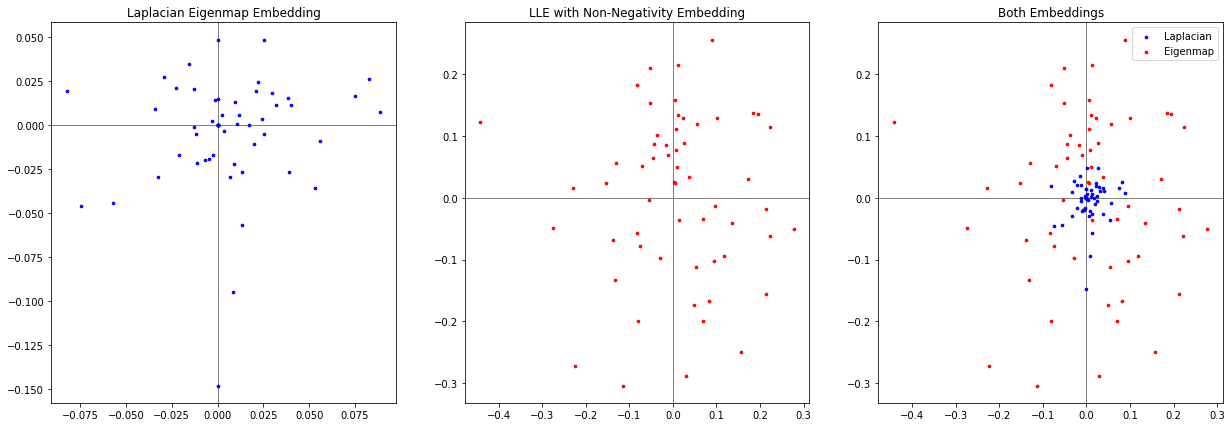

In [134]:
# Plot both embeddings in two different figures,
# and then on the same figure using different colors.
def add_axis_lines(ax): ax.axvline(x=0, c="gray", linewidth=1, zorder=-1); ax.axhline(y=0, c="gray", linewidth=1, zorder=-1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))
add_axis_lines(ax3)
add_axis_lines(ax2)
add_axis_lines(ax1)

ax1.scatter(*laplacian_eigenmap_embedding, s=7, color="blue")
ax1.set_title("Laplacian Eigenmap Embedding")

ax2.scatter(*lle_embedding, s=7, color="red")
ax2.set_title("LLE with Non-Negativity Embedding")

ax3.scatter(*laplacian_eigenmap_embedding, s=7, color="blue", label="Laplacian")
ax3.scatter(*lle_embedding, s=7, color="red", label="Eigenmap")
ax3.set_title("Both Embeddings")
ax3.legend()